In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
image_path = 'C:\\Users\\adity\\Downloads\\KDAGTASK2\\3.png'
# Open the image using Pillow
img = Image.open(image_path)
# Convert the PIL image to a NumPy array
img_array = np.array(img)

print(img_array.shape)
print(img_array[32][13])


(64, 64, 4)
[  0   0   0 255]


# Converting 4 channel image into black and white image

In [3]:
data_image = img.convert('L')
data = np.array(data_image)
print(data.shape)

(64, 64)


In [4]:
print(data[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [5]:

print(data.shape[1])

64


# Initialize Centroids

In [6]:
def initialize_centroids(data, k):
    x_min = y_min = float('inf')
    x_max = float('-inf')
    y_max = float('-inf')
    centroids = []
    for point, value in np.ndenumerate(data):
        if value!= 0:
            x_min = min(point[0],x_min)
            y_min = min(point[1],y_min)
            x_max = max(point[0],x_max)
            y_max = max(point[1],y_max)
    for i in range(k):
        centroids.append((np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)))
        
    return centroids

# Distance of each data point from centroids

In [7]:
def distance(data_point, centroid):
    return np.sqrt((data_point[0] - centroid[0])**2 + (data_point[1] - centroid[1])**2)

# Finding the closest Centroid to each data point

In [8]:
def centroids_indices(data, centroids, k):
    indices = []
    for point, value in np.ndenumerate(data):  # it will give position and value of each element
        if value != 0:
            min_dist = float('inf')
            index = None
            for i in range(k):
                new_dist = distance(point, centroids[i])
                if new_dist < min_dist:
                    min_dist = new_dist
                    index = i
            indices.append((point[0], point[1], index))
    return indices 


# Forming a Cluster

In [9]:
def form_clusters(indices, k):
    clusters = [[] for _ in range(k)] 
    
    for i in range(k):
        for t in range(len(indices)):
            if indices[t][2] == i:
                 clusters[i].append((indices[t][0], indices[t][1]))
    clusters_numpy = []
    for i in range(k):
        clusters_numpy.append(np.array(clusters[i]))           
    return clusters_numpy

# Finding new centroid using mean of data points of a cluster

In [10]:
def new_centroids(clusters, k):
    new_centroids = [[0,0] for _ in range(k)] 
    counts = [0] * k
    
    for i in range(k):
            for j in range(len(clusters[i])):
                 new_centroids[i][0] += clusters[i][j][0]
                 new_centroids[i][1] += clusters[i][j][1]
                 counts[i] += 1   
    for z in range(k):
        if counts[z] != 0:
                new_centroids[z] = (new_centroids[z][0] / counts[z] , new_centroids[z][1] / counts[z])
                
    return new_centroids    

# Calculating wcss

In [11]:
def get_wcss( clusters, centroids):
  sum_of_sq = 0
  for i in range(len(centroids)):
        for point in clusters[i]:  
            sum_of_sq += (distance(point, centroids[i]))**2
        
  return sum_of_sq
             
    

# K_Means Algorithm

In [12]:
def K_Means (data, k):
    condition = True
    while condition == True:
        initial_centroids = initialize_centroids(data, k)

        indices = centroids_indices(data, initial_centroids, k)
        clusters = form_clusters(indices, k) # clusters is a 3D list
        centroids = new_centroids(clusters, k)
        condition = False
        i = 0
        while i == (initial_centroids == centroids):
            initial_centroids = centroids
            indices = centroids_indices(data, initial_centroids, k)
            clusters = form_clusters(indices, k)
            centroids = new_centroids(clusters, k)
        for  i in range(len(centroids)):
            if centroids[i] == [0,0]:
                condition = True
               
    return clusters, centroids

# Plot of WCSS and Number of Clusters

In [13]:
k_range = np.arange(1,7)
wcss = np.empty(len(k_range))

"""for i in range(len(k_range)):
    clusters_wcss, centroids_wcss = K_Means(data, k_range[i])
    wcss[i] = get_wcss( clusters_wcss, centroids_wcss)"""
    
min_wcss = np.full(len(k_range), np.inf)
for i in range(len(k_range)):
    for iteration in range(10):
        clusters_wcss, centroids_wcss = K_Means(data, k_range[i])
        wcss[i] = get_wcss( clusters_wcss, centroids_wcss)
        if min_wcss[i] > wcss[i]:
            min_wcss[i] = wcss[i]
        





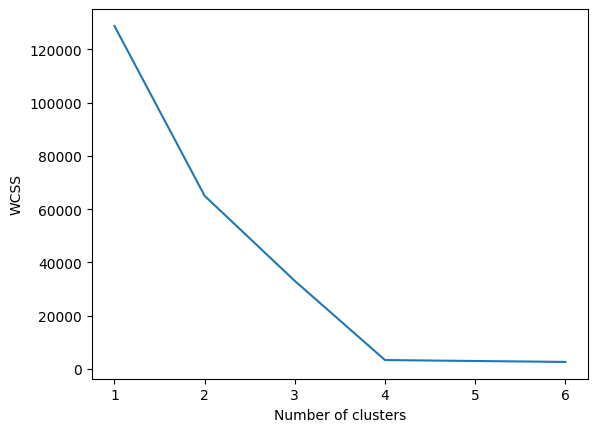

In [14]:
plt.plot(k_range, min_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [15]:
print(k_range)
print(min_wcss)
len(k_range)

[1 2 3 4 5 6]
[128785.71974522  64999.18381635  33055.92936832   3339.63295213
   2987.50826673   2637.74329994]


6

# Calculating perpendicular distance

In [16]:
def perpendicular_distance(point, line_point1, line_point2):
    x0, y0 = point
    x1, y1 = line_point1
    x2, y2 = line_point2
    
    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    
    distance = numerator / denominator
    return distance

# Calculating the value of K

In [17]:
def calc_k(min_wcss, k_range):
    elbow_array = np.column_stack((k_range,min_wcss))
    max_distance = float('-inf')
    pos = 0
    for i in range(1, len(k_range) - 1):
        per_dist = perpendicular_distance(elbow_array[i], elbow_array[0], elbow_array[len(k_range)-1])
        if max_distance < per_dist:
            max_distance = per_dist
            pos = i

    return elbow_array[pos][0]

# Getting clusters and centroids

In [18]:
k = int(calc_k(min_wcss, k_range))
clusters, centroids = K_Means(data, k)
print(clusters)
print(centroids)


[array([[43, 51],
       [43, 53],
       [44, 46],
       [45, 51],
       [45, 52],
       [46, 48],
       [46, 52],
       [46, 53],
       [47, 47],
       [47, 48],
       [47, 51],
       [47, 53],
       [48, 48],
       [48, 53],
       [48, 54],
       [48, 55],
       [49, 44],
       [49, 47],
       [49, 50],
       [49, 52],
       [49, 55],
       [50, 47],
       [50, 49],
       [50, 52],
       [51, 50],
       [51, 51],
       [51, 52],
       [51, 54],
       [52, 47],
       [52, 49],
       [52, 52],
       [52, 54],
       [53, 47],
       [53, 48],
       [54, 43],
       [54, 46],
       [54, 49],
       [55, 48],
       [58, 50]]), array([[ 2, 51],
       [ 3, 40],
       [ 4, 51],
       [ 5, 43],
       [ 5, 48],
       [ 6, 47],
       [ 6, 55],
       [ 8, 44],
       [ 8, 46],
       [ 8, 49],
       [ 8, 50],
       [ 8, 51],
       [ 8, 52],
       [ 9, 47],
       [ 9, 49],
       [ 9, 50],
       [ 9, 51],
       [ 9, 52],
       [ 9, 53],
       [10,

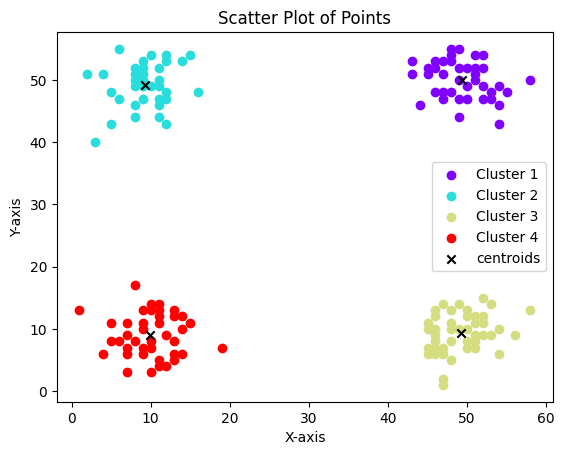

                  Clusters   Distance
0  Cluster 1 and Cluster 2  40.137182
1  Cluster 1 and Cluster 3  40.607415
2  Cluster 1 and Cluster 4  56.887094
3  Cluster 2 and Cluster 3  56.339962
4  Cluster 2 and Cluster 4  40.123840
5  Cluster 3 and Cluster 4  39.261275


In [19]:
centroids_array = np.array(centroids)

colors = plt.cm.rainbow(np.linspace(0, 1, len(centroids)))
labels = [f'Cluster {i+1}' for i in range(len(centroids))]

# Plotting each array with a different color and label
for i, array in enumerate(clusters):
    plt.scatter(array[:,0],array[:,1], color=colors[i], label=labels[i])


plt.scatter(centroids_array[:,0], centroids_array[:,1], color='black', marker='x', label = 'centroids')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.legend()
# Show the plot
plt.show()

distances = np.linalg.norm(centroids_array[:, np.newaxis] - centroids_array, axis=2)

rows = []
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        rows.append({"Clusters": f'Cluster {i+1} and Cluster {j+1}', "Distance": distances[i, j]})
distances = pd.DataFrame(rows)
print(distances)